# 1. Import and Install Dependencies

!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib
!pip install --upgrade imutils

In [2]:
!pip install sklearn

You should consider upgrading via the 'c:\users\koolm\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from imutils.video import FileVideoStream
from imutils.video import FPS
import imutils

ModuleNotFoundError: No module named 'cv2'

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [20]:
cap = cv2.VideoCapture('hello.mp4')
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print( length )
fps    = cap.get(cv2.CAP_PROP_FPS)
start=round(fps*1.8)
end=round(length-(fps*0.6))
print(start,end)
print(fps)

222
45 207
25.0


In [13]:
cap = cv2.VideoCapture('Assalam-o-Alaikum.mp4')
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print( length )
fps    = cap.get(cv2.CAP_PROP_FPS)
start=round(fps*1.5)
end=round(length-fps*2)
mid=(start+end)//2
end=mid-fps
print(start-end)
print(fps)
cap.set(cv2.CAP_PROP_POS_FRAMES, start)
# Set mediapipe model 
loop=1
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    frame_counter = start
    flip=False
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()
        if flip:
            frame=cv2.flip(frame,1)
        frame_counter+=1
        #print(frame_counter)
        if frame_counter == end:
            #print(loop,end)
            #print(loop//2)
            if flip is False:
                flip=True
            else:
                flip=False
                if loop%2 == 0 and loop >= 2:
                    start=round(fps*1.5)
                    end=mid-fps
                else:
                    start=mid+fps
                    end=round(length-fps*2)
                loop+=1
            frame_counter = start
            cap.set(cv2.CAP_PROP_POS_FRAMES, start)
            continue

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

248
-55.0
25.0


In [22]:
cap.release()
cv2.destroyAllWindows()

In [23]:
import cv2

cap = cv2.VideoCapture("hello.mp4")
fps = cap.get(cv2.CAP_PROP_FPS)      # OpenCV2 version 2 used "CV_CAP_PROP_FPS"
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count/fps

print('fps = ' + str(fps))
print('number of frames = ' + str(frame_count))
print('duration (S) = ' + str(duration))
minutes = int(duration/60)
seconds = duration%60
print('duration (M:S) = ' + str(minutes) + ':' + str(seconds))

cap.release()

fps = 25.0
number of frames = 222
duration (S) = 8.88
duration (M:S) = 0:8.88


In [24]:
draw_landmarks(frame, results)

In [25]:
cap.release()
cv2.destroyAllWindows()

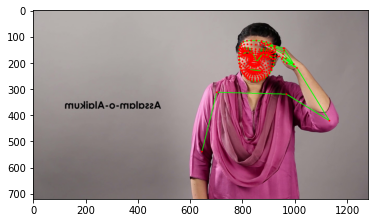

In [26]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [27]:
len(results.left_hand_landmarks.landmark)

21

In [28]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [29]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [30]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [7]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [32]:
result_test = extract_keypoints(results)

In [33]:
result_test

array([ 0.66799438,  0.2739543 , -0.85648173, ...,  0.        ,
        0.        ,  0.        ])

In [34]:
np.save('0', result_test)

In [35]:
np.load('0.npy')

array([ 0.66799438,  0.2739543 , -0.85648173, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [57]:
# Path for exported data, numpy arrays
import pathlib

DATA_PATH = data_path=pathlib.Path.cwd().joinpath('MP_DATA')

# Actions that we try to detect
actions = np.array(['hello', 'alright', 'Assalam-o-Alaikum','good afternoon','good evening','good morning'])

# Thirty videos worth of data
no_sequences = 14

# Videos are going to be 30 frames in length
sequence_length = 14

# Folder start
start_folder = 0

In [61]:
pathlib.Path(DATA_PATH).joinpath('good evening').is_dir()

False

In [37]:
# for action in actions:
#     for s in range(0,no_sequences):
#         pathlib.Path(data_path).joinpath(action,str(s)).mkdir(parents=True, exist_ok=True)

# 5. Collect Keypoint Values for Training and Testing

In [62]:
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        if pathlib.Path(DATA_PATH).joinpath(action).is_dir():
            print(action)
            continue
        cap = cv2.VideoCapture(f'{action}.mp4')
        # Loop through sequences aka videos
        length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        fps    = cap.get(cv2.CAP_PROP_FPS)
        start=round(fps*1.5)
        end=round(length-fps*2)
        mid=(start+end)//2
        end=mid-fps
        cap.set(cv2.CAP_PROP_POS_FRAMES, start)
        loop=1
        frame_counter = start
        flip=False
        while loop <= no_sequences:
            # Loop through video length aka sequence length
            next=False
            f=0
            while next is not True:

                # Read feed
                ret, frame = cap.read()
                if flip:
                    frame=cv2.flip(frame,1)
                frame_counter+=1
                f+=1
                #print(frame_counter)
                if frame_counter == end:
                    #print(loop,end)
                    #print(loop//2)
                    if flip is False:
                        flip=True
                    else:
                        flip=False
                        if loop%2 == 0 and loop >= 2:
                            start=round(fps*1.5)
                            end=mid-fps
                        else:
                            start=mid+fps
                            end=round(length-fps*2)
                        loop+=1
                    next=True
                    frame_counter = start
                    cap.set(cv2.CAP_PROP_POS_FRAMES, start)
                    continue

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                
                cv2.imshow('OpenCV Feed', image)
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                pathlib.Path(data_path).joinpath(action,str(loop)).mkdir(parents=True, exist_ok=True)
                npy_path = pathlib.Path(data_path).joinpath(action,str(loop),str(f))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

hello
alright
Assalam-o-Alaikum


In [18]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [63]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [64]:
label_map = {label:num for num, label in enumerate(actions)}

In [80]:
label_map

{'hello': 0,
 'alright': 1,
 'Assalam-o-Alaikum': 2,
 'good afternoon': 3,
 'good evening': 4,
 'good morning': 5}

In [79]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(1,sequence_length+1):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [81]:
np.array(sequences).shape

(84, 14, 1662)

In [82]:
np.array(labels).shape

(84,)

In [83]:
X = np.array(sequences)

In [84]:
X.shape

(84, 14, 1662)

In [85]:
y = to_categorical(labels).astype(int)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [92]:
y_test.shape

(5, 6)

# 7. Build and Train LSTM Neural Network

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [94]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [95]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [96]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [97]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])

Epoch 1/500
3/3 [==============================] - 3s 224ms/step - loss: 1.8451 - categorical_accuracy: 0.2025
Epoch 2/500
3/3 [==============================] - 0s 33ms/step - loss: 1.7939 - categorical_accuracy: 0.1646
Epoch 3/500
3/3 [==============================] - 0s 43ms/step - loss: 1.7986 - categorical_accuracy: 0.1772
Epoch 4/500
3/3 [==============================] - 0s 33ms/step - loss: 1.8093 - categorical_accuracy: 0.1266
Epoch 5/500
3/3 [==============================] - 0s 34ms/step - loss: 1.7742 - categorical_accuracy: 0.2025
Epoch 6/500
3/3 [==============================] - 0s 41ms/step - loss: 1.7670 - categorical_accuracy: 0.3165
Epoch 7/500
3/3 [==============================] - 0s 39ms/step - loss: 1.7305 - categorical_accuracy: 0.3291
Epoch 8/500
3/3 [==============================] - 0s 34ms/step - loss: 1.6849 - categorical_accuracy: 0.3418
Epoch 9/500
3/3 [==============================] - 0s 38ms/step - loss: 1.5975 - categorical_accuracy: 0.3165
Epoch 10/

In [98]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 14, 64)            442112    
_________________________________________________________________
lstm_7 (LSTM)                (None, 14, 128)           98816     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 198       
Total params: 596,774
Trainable params: 596,774
Non-trainable params: 0
________________________________________________

# 8. Make Predictions

In [99]:
res = model.predict(X_test)

In [100]:
actions[np.argmax(res[2])]

'hello'

In [101]:
actions[np.argmax(y_test[2])]

'hello'

# 9. Save Weights

In [102]:
model.save('action.h5')

In [ ]:
del model

In [ ]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [103]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [104]:
yhat = model.predict(X_test)

In [105]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [106]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[4, 0],
        [0, 1]],

       [[4, 0],
        [0, 1]],

       [[4, 0],
        [0, 1]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [107]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [108]:
from scipy import stats

In [109]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [110]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

IndexError: list index out of range